In [ ]:
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
path = "/content/drive/MyDrive/Computer Vision Masterclass/Datasets/yalefaces.zip"
zip_object=zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
import os 
print(os.listdir('/content/yalefaces/train'))

['subject13.rightlight.gif', 'subject05.glasses.gif', 'subject15.noglasses.gif', 'subject01.sleepy.gif', 'subject04.normal.gif', 'subject15.happy.gif', 'subject11.leftlight.gif', 'subject13.wink.gif', 'subject15.surprised.gif', 'subject10.rightlight.gif', 'subject10.normal.gif', 'subject01.sad.gif', 'subject10.leftlight.gif', 'subject02.happy.gif', 'subject13.normal.gif', 'subject01.wink.gif', 'subject14.noglasses.gif', 'subject06.wink.gif', 'subject03.happy.gif', 'subject05.wink.gif', 'subject08.centerlight.gif', 'subject12.sleepy.gif', 'subject07.sleepy.gif', 'subject12.noglasses.gif', 'subject03.normal.gif', 'subject15.normal.gif', 'subject10.wink.gif', 'subject12.wink.gif', 'subject05.centerlight.gif', 'subject14.sleepy.gif', 'subject08.surprised.gif', 'subject14.leftlight.gif', 'subject09.centerlight.gif', 'subject07.centerlight.gif', 'subject08.wink.gif', 'subject15.centerlight.gif', 'subject11.surprised.gif', 'subject07.glasses.gif', 'subject08.glasses.gif', 'subject10.surprised

In [ ]:
def get_image_data():
  paths=[os.path.join('/content/yalefaces/train',f) for f in os.listdir('/content/yalefaces/train')]
  # print(paths)
  faces=[]
  ids=[]
  for path in paths:
    # pil is used because the image type is gif
    image=Image.open(path).convert('L') 
    # print(type(image))
    image_np=np.array(image,'uint8')
    # int is used to convert 01 to 1 or 07 to 7 etc
    id=int(path.split('/')[-1].split('.')[0].replace('subject',''))
    ids.append(id)
    faces.append(image_np)
  
  return np.array(ids),faces

In [ ]:
ids,faces = get_image_data()

In [ ]:
ids

array([13,  5, 15,  1,  4, 15, 11, 13, 15, 10, 10,  1, 10,  2, 13,  1, 14,
        6,  3,  5,  8, 12,  7, 12,  3, 15, 10, 12,  5, 14,  8, 14,  9,  7,
        8, 15, 11,  7,  8, 10, 14,  7, 12,  1,  8,  6,  2,  5, 10,  3,  3,
       11,  5,  9,  3,  2,  4, 13,  8,  9,  4,  3, 12,  2,  6,  7,  7,  2,
        1,  2, 12,  9, 11, 14,  8,  6,  7,  6,  1, 13,  5,  1,  7,  1, 12,
        7, 12, 11, 13, 13, 15,  3,  4,  4, 14, 10, 11,  4,  5,  9, 14,  2,
        8,  4,  4, 13, 15,  3,  2,  5,  6,  8, 12, 14, 10,  9, 15, 11,  2,
       11,  5,  4, 11,  9, 13, 15,  6,  6,  9,  1,  3,  6,  9, 14, 10])

In [ ]:
len(ids)

135

In [ ]:
faces

[array([[ 97, 107, 119, ..., 255, 255, 255],
        [221, 239, 255, ..., 255, 255, 255],
        [221, 255, 255, ..., 255, 255, 255],
        ...,
        [110, 112, 111, ..., 158, 154, 159],
        [111, 110, 111, ..., 163, 158, 165],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[119, 129, 130, ..., 255, 255, 255],
        [253, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ...,  91,  88,  91],
        [255, 255, 255, ..., 101,  98, 102],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 248, 250, 255],
        [255, 255, 255, ..., 246, 253, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 25

In [ ]:
faces[0].shape

(243, 320)

In [ ]:
243*320

77760

In [ ]:
lbph_classifier= cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces,ids)
lbph_classifier.write('lbph_classifier.yml')
# by default lbph_classifier stores 8*8 = 64 histograms for each of the images

In [ ]:
lbph_classifier.read('/content/lbph_classifier.yml')

In [ ]:
test_image='/content/yalefaces/test/subject10.sad.gif'

In [ ]:
# 'L' to convert image to greyscale
image=Image.open(test_image).convert('L')
image_np = np.array(image,'uint8')
image_np

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 241, 255, 255],
       [255, 255, 255, ..., 234, 237, 252],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)

In [ ]:
image_np.shape

(243, 320)

In [ ]:
prediction = lbph_classifier.predict(image_np)

In [ ]:
prediction

(10, 7.88294453637355)

In [ ]:
expected_output = int(os.path.split(test_image)[1].split('.')[0].replace('subject',''))

In [ ]:
expected_output

10

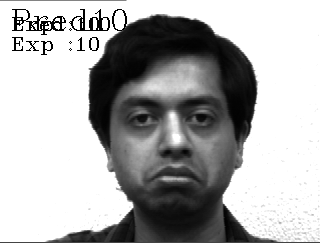

In [ ]:
cv2.putText(image_np, 'Pred :'+str(prediction[0]),(10,30),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,255))
cv2.putText(image_np, 'Exp :'+str(expected_output),(10,50),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,255))

cv2_imshow(image_np)


## Evaluating the face classifier

In [ ]:
paths= [os.path.join('/content/yalefaces/test',f) for f in os.listdir('/content/yalefaces/test')]
predictions=[]
expected_outputs=[]
for path in paths:
  # print(path)
  image = Image.open(path).convert('L')
  image_np = np.array(image,'uint8')
  prediction,_=lbph_classifier.predict(image_np)
  expected_output=int(os.path.split(path)[1].split('.')[0].replace('subject',''))

  predictions.append(prediction)
  expected_outputs.append(expected_output)

In [ ]:
type(predictions)

list

In [ ]:
predictions=np.array(predictions)
expected_outputs=np.array(expected_outputs)

In [ ]:
predictions

array([11, 14,  4,  8,  9, 14,  4,  6,  5,  7,  1, 12, 13,  7, 14,  7, 15,
        5,  4,  1, 11,  9,  4, 10,  5,  3,  9,  9, 13, 12])

In [ ]:
expected_outputs

array([11, 14,  8,  8,  4, 14,  2,  6,  2,  9,  1, 12, 13, 15,  6,  7, 15,
        5,  4,  1, 11,  9, 10, 10,  5,  3,  7,  3, 13, 12])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_outputs,predictions)

0.6666666666666666

In [ ]:
len(predictions)

30

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_outputs,predictions) 

In [ ]:
cm

array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

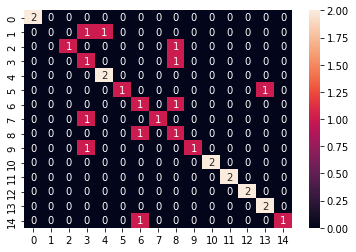

In [ ]:
import seaborn
seaborn.heatmap(cm,annot=True);


### default parameters can be found in the yml file saved, we can work on tuning those parameters to improve the model performance


## Dlib

In [ ]:
import dlib
import cv2
from google.colab.patches import cv2_imshow

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
face_detector = dlib.get_frontal_face_detector()
points_detector=dlib.shape_predictor("/content/drive/MyDrive/Computer Vision Masterclass/Weights/shape_predictor_68_face_landmarks.dat")

#dlib look for 68 points in face to identify it as face and then draw bounding boxes around it

In [ ]:
image=cv2.imread("/content/drive/MyDrive/Computer Vision Masterclass/Images/people2.jpg")

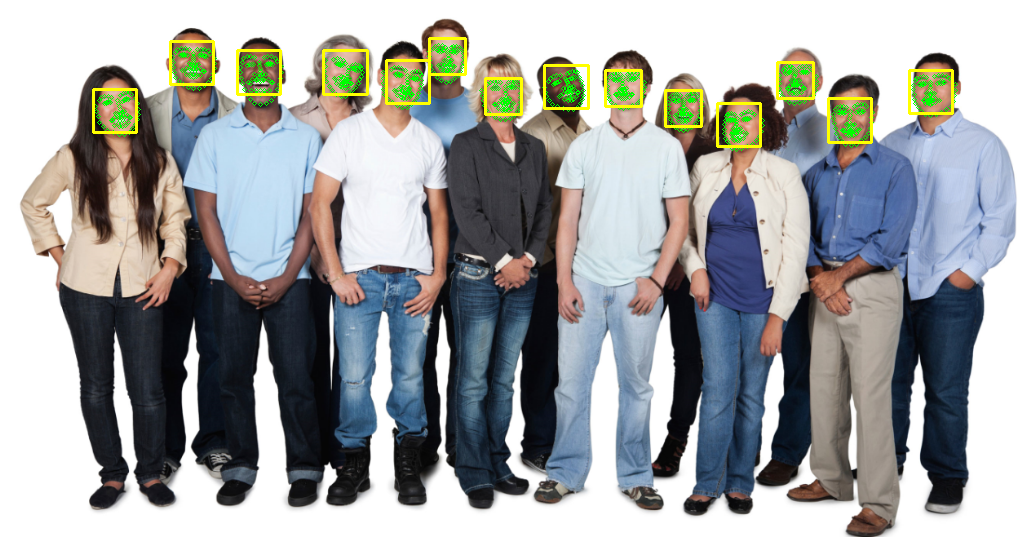

In [ ]:


# 1 is the scale of image
face_detection = face_detector(image,1) 
for face in face_detection:
  points = points_detector(image,face)
  for point in points.parts():
    cv2.circle(image,(point.x,point.y),2,(0,255,0),1)
  # print(points.parts())
  # print(len(points.parts()))

  l,t,r,b=face.left(),face.top(),face.right(),face.bottom()
  cv2.rectangle(image,(l,t),(r,b),(0,255,255),2)
cv2_imshow(image)


## Detecting facial descriptors

In [2]:
import os
import dlib
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import numpy as np

In [3]:
face_detector = dlib.get_frontal_face_detector()
points_detector=dlib.shape_predictor("/content/drive/MyDrive/Computer Vision Masterclass/Weights/shape_predictor_68_face_landmarks.dat")
face_descriptor_extractor=dlib.face_recognition_model_v1("/content/drive/MyDrive/Computer Vision Masterclass/Weights/dlib_face_recognition_resnet_model_v1.dat")

In [4]:
index = {}
idx=0
face_descriptors=None

In [5]:
import zipfile
path = "/content/drive/MyDrive/Computer Vision Masterclass/Datasets/yalefaces.zip"
zip_object=zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

### Creating the fingerprints using the train images, saving all the image features into face_descriptors 

In [6]:
paths=[os.path.join('/content/yalefaces/train',f) for f in os.listdir('/content/yalefaces/train')]
for path in paths:
  # print(path)
  image= Image.open(path).convert('RGB')
  image_np=np.array(image,'uint8')
  face_detection=face_detector(image_np,1)
  for face in face_detection:
    l,t,r,b=face.left(),face.top(),face.right(),face.bottom()
    cv2.rectangle(image_np,(l,t),(r,b),(0,0,255),2)  
    points = points_detector(image_np,face)
    for point in points.parts():
      cv2.circle(image_np,(point.x,point.y),2,(0,255,0),1)
    face_descriptor=face_descriptor_extractor.compute_face_descriptor(image_np,points)
    # print(face_descriptor)
    # print(len(face_descriptor))   
    ##converting the values into a list so that the values associated with each face will be inside a list
    face_descriptor = [f for f in face_descriptor]
    ##converting the list into a numpy array
    face_descriptor = np.asarray(face_descriptor,dtype=np.float64)
    # print(face_descriptor)
    # print(face_descriptor.shape)
    ## below code will convert the shape from (128,) to (1,128) by adding a new axis 
    face_descriptor=face_descriptor[np.newaxis,:]
    # print(face_descriptor.shape)
    if face_descriptors is None:
      face_descriptors=face_descriptor
    else:
      ##axis =0 means we will add new row for each of the faces
      face_descriptors=np.concatenate((face_descriptors,face_descriptor),axis=0)
    index[idx] = path
    idx +=1  



  # cv2_imshow(image_np)

In [7]:
face_descriptors.shape 

(132, 128)

In [8]:
face_descriptors

array([[-1.23076051e-01,  1.54292598e-01,  3.71916443e-02, ...,
        -4.48068865e-02,  5.82259446e-02,  5.21790721e-02],
       [-1.67584285e-01,  1.58402115e-01,  4.89725955e-02, ...,
        -2.62205955e-03,  1.20814405e-01,  7.99242035e-02],
       [-1.79643020e-01,  6.46162927e-02,  2.89057195e-03, ...,
        -1.47615634e-02,  5.76127470e-02,  4.70218807e-02],
       ...,
       [-1.20886482e-01,  5.87055013e-02,  5.35115153e-02, ...,
         1.38996495e-02,  1.31006062e-01,  7.60899782e-02],
       [-1.98475316e-01,  1.23705588e-01,  1.38584524e-04, ...,
        -7.71692693e-02,  4.59305868e-02,  7.57010728e-02],
       [-1.52569383e-01,  7.84449875e-02,  3.40712778e-02, ...,
        -3.21114771e-02,  1.65268362e-01,  8.50140601e-02]])

In [9]:
len(face_descriptors)

132

In [10]:
index

{0: '/content/yalefaces/train/subject01.glasses.gif',
 1: '/content/yalefaces/train/subject13.noglasses.gif',
 2: '/content/yalefaces/train/subject02.wink.gif',
 3: '/content/yalefaces/train/subject07.wink.gif',
 4: '/content/yalefaces/train/subject03.sad.gif',
 5: '/content/yalefaces/train/subject08.noglasses.gif',
 6: '/content/yalefaces/train/subject05.centerlight.gif',
 7: '/content/yalefaces/train/subject03.noglasses.gif',
 8: '/content/yalefaces/train/subject13.rightlight.gif',
 9: '/content/yalefaces/train/subject12.sleepy.gif',
 10: '/content/yalefaces/train/subject14.wink.gif',
 11: '/content/yalefaces/train/subject07.glasses.gif',
 12: '/content/yalefaces/train/subject01.sad.gif',
 13: '/content/yalefaces/train/subject15.normal.gif',
 14: '/content/yalefaces/train/subject09.centerlight.gif',
 15: '/content/yalefaces/train/subject05.happy.gif',
 16: '/content/yalefaces/train/subject02.noglasses.gif',
 17: '/content/yalefaces/train/subject11.surprised.gif',
 18: '/content/yalef

## Calculating the distance between the faces

In [11]:
## these are the unique features extracted by the cnn by passing 69 facial points and the image to the cnn as input.
face_descriptors[0]

array([-0.12307605,  0.1542926 ,  0.03719164, -0.04883384, -0.09717602,
       -0.00052954, -0.08803014, -0.01928725,  0.11350162, -0.01874873,
        0.25426853, -0.02450133, -0.31291798, -0.09652472,  0.0445694 ,
        0.13638106, -0.09096295, -0.0491806 , -0.11771134, -0.09125808,
       -0.00042903,  0.00661212,  0.05301838, -0.01936134, -0.1573855 ,
       -0.29246491, -0.13630846, -0.05939817,  0.05512384, -0.12139054,
        0.02515452, -0.03204693, -0.15621607, -0.08150721,  0.02394025,
        0.13462482, -0.17128128, -0.12838016,  0.22669044, -0.03734044,
       -0.09419094,  0.0469633 ,  0.12316111,  0.20874058,  0.23410086,
        0.0464657 ,  0.05320658, -0.08589523,  0.06997316, -0.30068898,
        0.09572011,  0.15261126,  0.13935748,  0.13105981,  0.10405684,
       -0.14147341,  0.05010356,  0.21631965, -0.20878997,  0.03007628,
        0.05796517, -0.0416567 , -0.09891099, -0.04599684,  0.22928126,
        0.17156599, -0.15449664, -0.08825693,  0.16748534, -0.16

In [12]:
np.linalg.norm(face_descriptors[131]-face_descriptors[131])

0.0

In [13]:
## lower the value, more similar the image is
np.linalg.norm(face_descriptors[131]-face_descriptors[108])

0.6858418340109247

In [15]:
np.linalg.norm(face_descriptors[111]-face_descriptors[112])

0.12174888618250396

In [16]:
## comparing a face with all other faces,axis =1 means compare with all the columns
np.linalg.norm(face_descriptors[131]-face_descriptors,axis=1)

array([0.79965421, 0.6915879 , 0.81175471, 0.74151133, 0.62891264,
       0.44369724, 0.77208551, 0.55988622, 0.61041233, 0.84173835,
       0.60459104, 0.68294034, 0.81331899, 0.58136962, 0.73648679,
       0.81852767, 0.80228367, 0.78289583, 0.3612856 , 0.6619211 ,
       0.29461924, 0.66642737, 0.61384526, 0.58681611, 0.79429535,
       0.64830109, 0.57208981, 0.77600252, 0.87565914, 0.6446575 ,
       0.56439832, 0.85901001, 0.6129888 , 0.81896162, 0.85019733,
       0.79186675, 0.63023953, 0.83543538, 0.75022917, 0.69410118,
       0.58577858, 0.81860318, 0.58425591, 0.72600897, 0.73360234,
       0.77190449, 0.59960546, 0.82818655, 0.56376185, 0.65267506,
       0.63951754, 0.71664176, 0.58790961, 0.63419665, 0.82681046,
       0.64693749, 0.62681762, 0.7294537 , 0.77647878, 0.50252663,
       0.65822094, 0.6286227 , 0.42413048, 0.81028752, 0.68540594,
       0.67670423, 0.8394626 , 0.64450236, 0.62036833, 0.80228367,
       0.6807073 , 0.39749011, 0.88207797, 0.63735315, 0.73353

In [18]:
## givens the index with minimum value
np.argmin(np.linalg.norm(face_descriptors[0]-face_descriptors,axis=1))

0

In [19]:
np.argmin(np.linalg.norm(face_descriptors[0]-face_descriptors[1:],axis=1))

98

In [25]:
np.linalg.norm(face_descriptors[0]-face_descriptors[1:],axis=1)[98]

0.42523866229872126

## Detecting faces with dlib

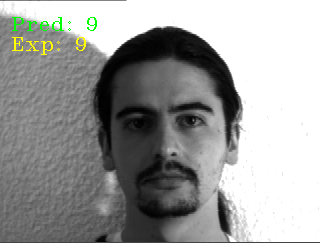

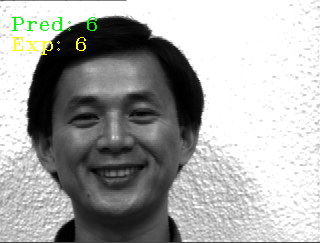

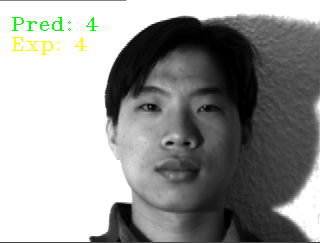

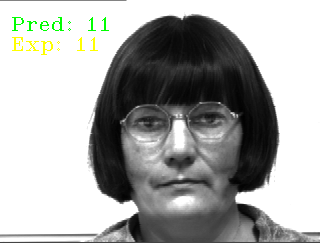

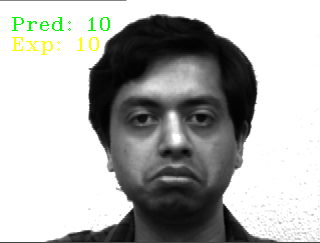

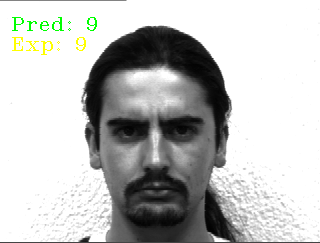

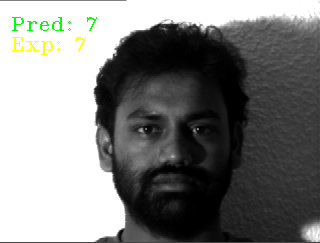

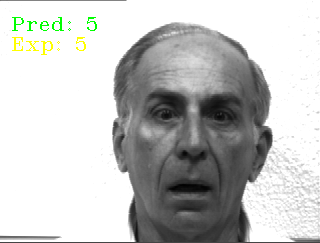

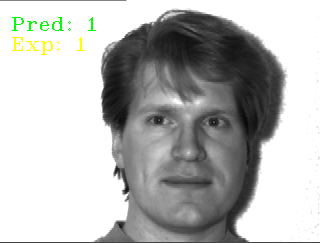

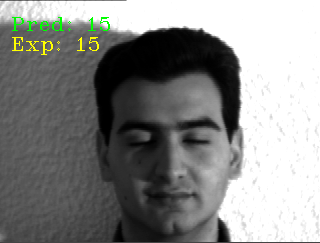

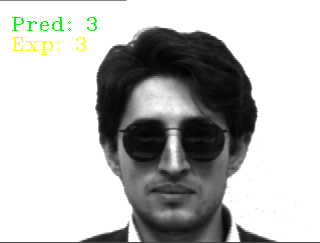

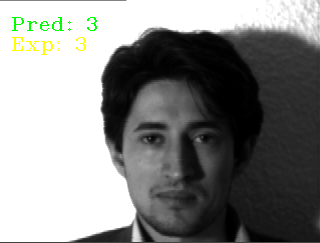

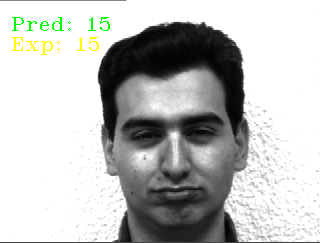

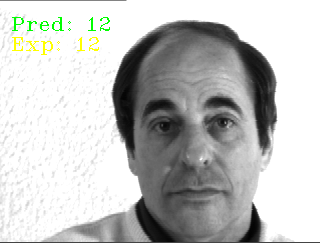

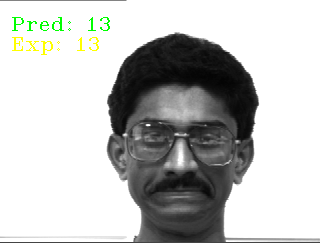

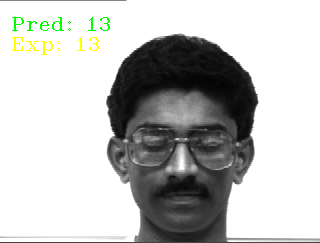

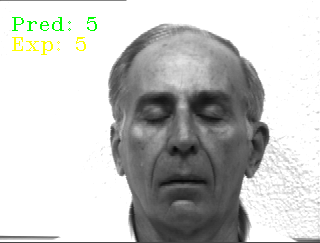

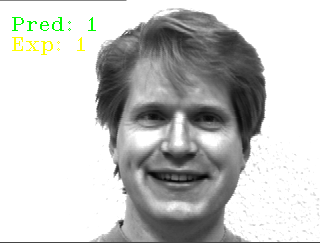

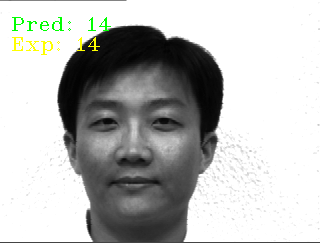

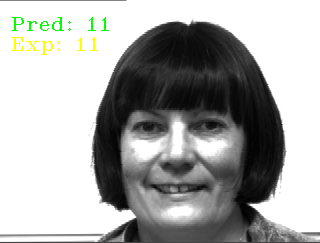

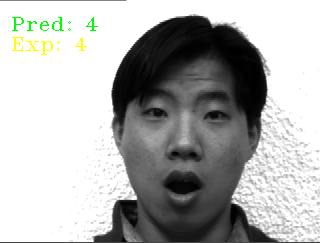

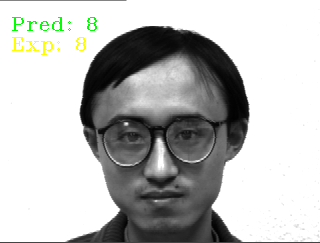

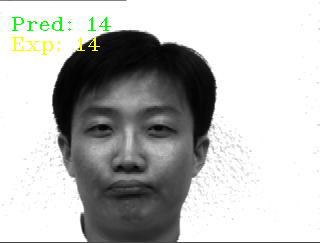

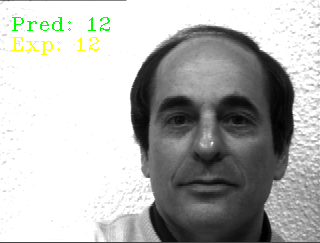

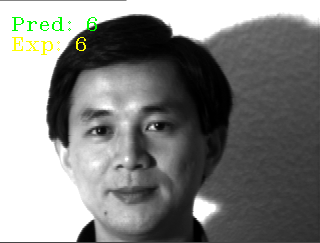

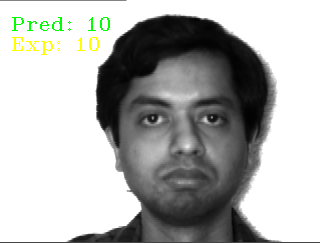

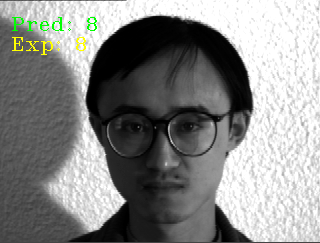

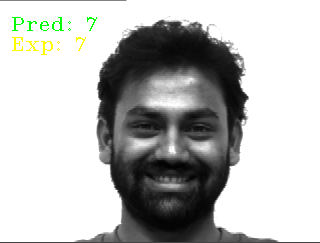

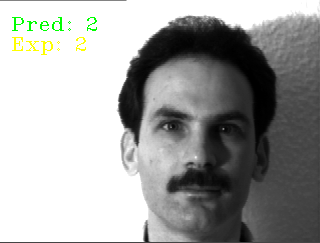

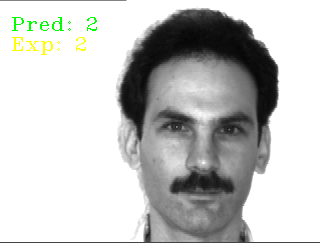

In [29]:
threshold = 0.5
paths = [os.path.join('/content/yalefaces/test',f) for f in os.listdir('/content/yalefaces/test')]
for path in paths:
  image= Image.open(path).convert('RGB')
  image_np = np.array(image,'uint8')
  face_detection=face_detector(image_np,1)
  for face in face_detection:
    points = points_detector(image_np,face)
    face_descriptor=face_descriptor_extractor.compute_face_descriptor(image_np,points)
    face_descriptor= [f for f in face_descriptor]
    face_descriptor=np.asarray(face_descriptor,dtype=np.float64)
    face_descriptor=face_descriptor[np.newaxis,:]
    distances = np.linalg.norm(face_descriptor-face_descriptors,axis=1) ##comparing the current face with the figerprint
    min_index = np.argmin(distances)
    min_distance = distances[min_index]
    if min_distance <= threshold:
      name_pred=int(os.path.split(index[min_index])[1].split('.')[0].replace('subject',''))
    else:
      name_pred ='Not Identified'
    real_name = int(os.path.split(path)[1].split('.')[0].replace('subject',''))

    cv2.putText(image_np,'Pred: '+str(name_pred),(10,30),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
    cv2.putText(image_np,'Exp: '+str(real_name),(10,50),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,255))


  cv2_imshow(image_np)  

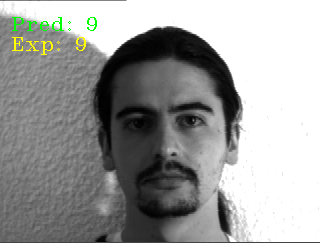

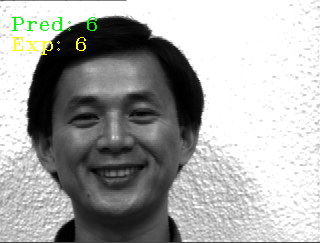

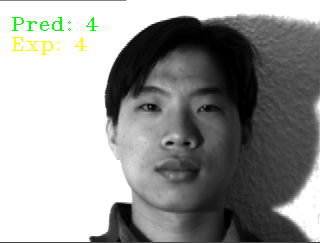

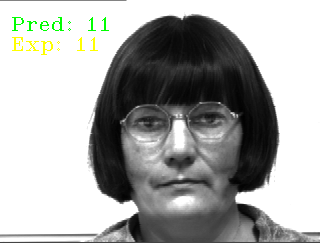

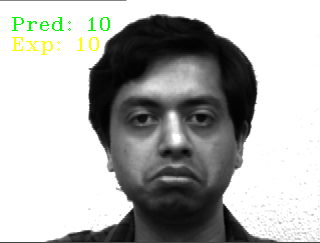

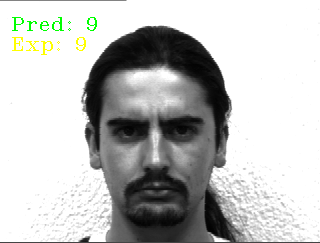

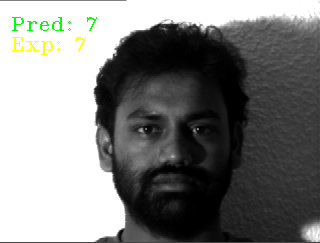

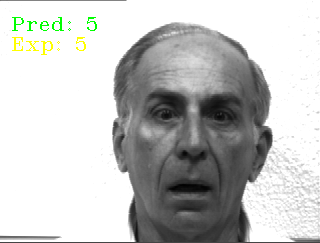

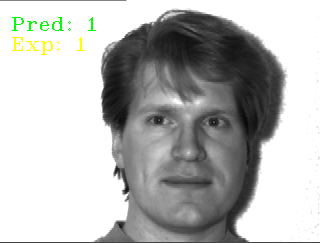

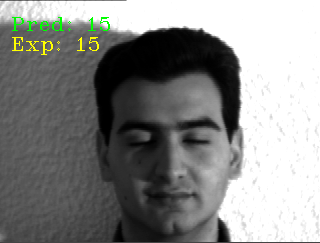

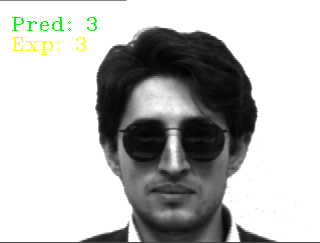

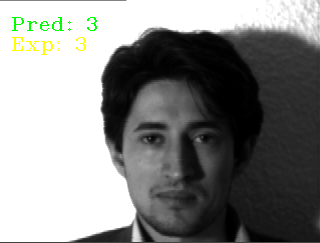

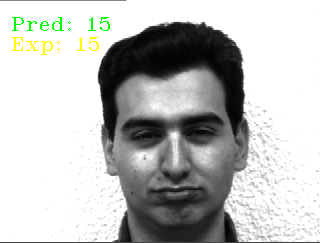

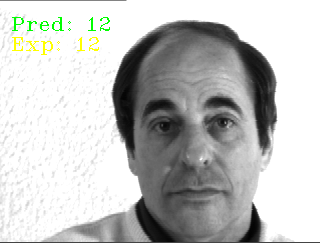

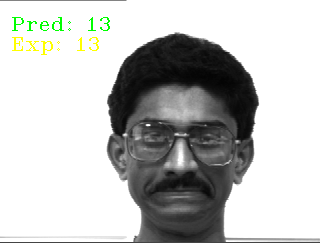

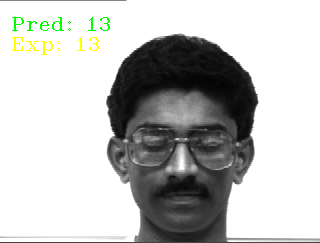

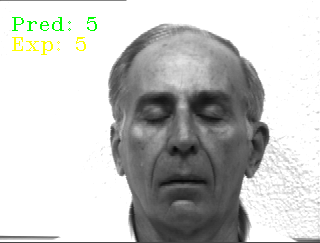

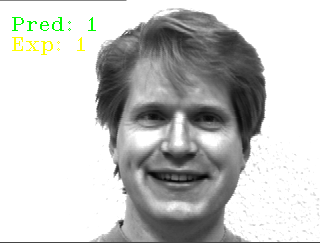

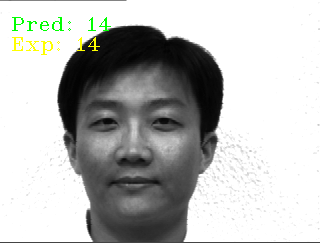

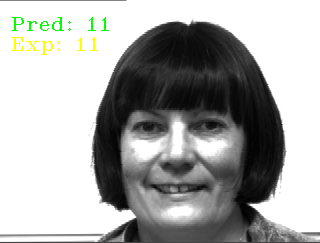

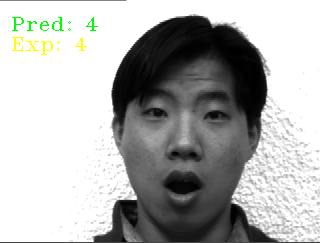

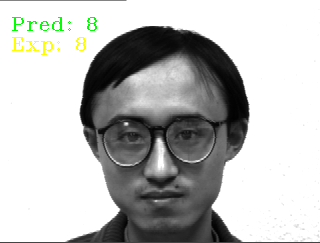

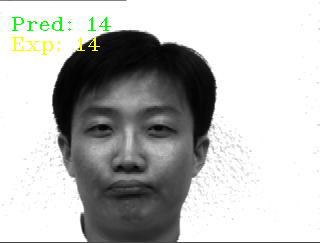

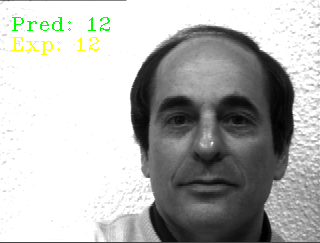

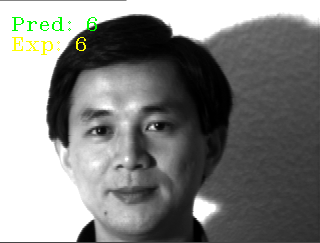

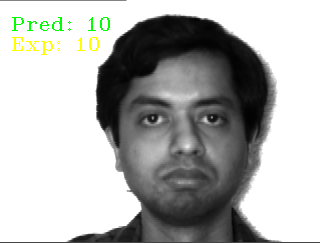

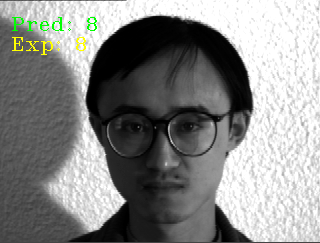

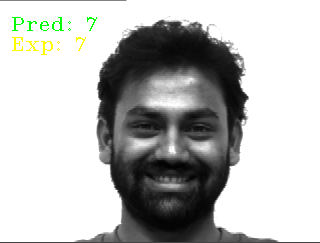

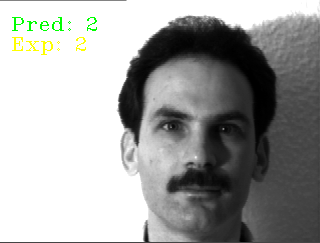

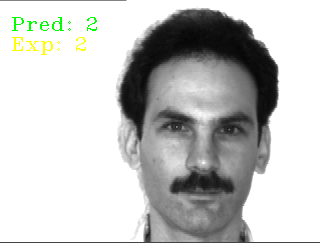

In [30]:
threshold = 0.5
predictions=[]
expected_outputs =[]

paths = [os.path.join('/content/yalefaces/test',f) for f in os.listdir('/content/yalefaces/test')]
for path in paths:
  image= Image.open(path).convert('RGB')
  image_np = np.array(image,'uint8')
  face_detection=face_detector(image_np,1)
  for face in face_detection:
    points = points_detector(image_np,face)
    face_descriptor=face_descriptor_extractor.compute_face_descriptor(image_np,points)
    face_descriptor= [f for f in face_descriptor]
    face_descriptor=np.asarray(face_descriptor,dtype=np.float64)
    face_descriptor=face_descriptor[np.newaxis,:]
    distances = np.linalg.norm(face_descriptor-face_descriptors,axis=1)
    min_index = np.argmin(distances)
    min_distance = distances[min_index]
    if min_distance <= threshold:
      name_pred=int(os.path.split(index[min_index])[1].split('.')[0].replace('subject',''))
    else:
      name_pred ='Not Identified'
    real_name = int(os.path.split(path)[1].split('.')[0].replace('subject',''))

    predictions.append(name_pred)
    expected_outputs.append(real_name)

    cv2.putText(image_np,'Pred: '+str(name_pred),(10,30),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
    cv2.putText(image_np,'Exp: '+str(real_name),(10,50),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,255))


  cv2_imshow(image_np)  

predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)

In [31]:
predictions

array([ 9,  6,  4, 11, 10,  9,  7,  5,  1, 15,  3,  3, 15, 12, 13, 13,  5,
        1, 14, 11,  4,  8, 14, 12,  6, 10,  8,  7,  2,  2])

In [32]:
expected_outputs

array([ 9,  6,  4, 11, 10,  9,  7,  5,  1, 15,  3,  3, 15, 12, 13, 13,  5,
        1, 14, 11,  4,  8, 14, 12,  6, 10,  8,  7,  2,  2])

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_outputs,predictions)

1.0

## In case of webcam, we first need to convert the frame into greyscale sent it to face detector to detect the face , resize it and then send it to face recognizer, and then compare the result with the fingerprint